In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Train.csv')

df.head(3)

ID account_type gender  age  region_code  cc_cons_apr  dc_cons_apr  \
0  12554      current      M   35          708     24893.00        378.0   
1  17645      current      M   35          123     18941.62        966.0   
2   7604      current      M   55          802      5678.87       2724.0   

   cc_cons_may  dc_cons_may  cc_cons_jun  ...  debit_count_may  \
0      10288.0     29664.00     16291.40  ...               40   
1      20672.0       287.00      4217.00  ...               78   
2       1964.5      3933.11     23956.25  ...               82   

   max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                24563.0          30051.32            12761.0   
1                23948.0          42119.05            76206.0   
2                10752.0          58373.25            75283.0   

   credit_count_jun  debit_count_jun  max_credit_amount_jun  loan_enq  \
0                 2               65                50836.0         Y   
1                21               63                23226.0         Y   
2                 7                1                27036.0         Y   

   emi_active  cc_cons  
0     1674.09    20014  
1    13043.34    10173  
2    25375.27    16095  

[3 rows x 44 columns]

In [3]:
df=df.set_index('ID')

In [4]:
#df.dtypes

In [5]:
le_ac=LabelEncoder()
le_g=LabelEncoder()
le_le=LabelEncoder()

df.account_type=le_ac.fit_transform(df.account_type)
df.gender=le_g.fit_transform(df.gender)
df.loan_enq =le_le.fit_transform(df.loan_enq)

In [7]:
df.head()

account_type  gender  age  region_code  cc_cons_apr  dc_cons_apr  \
ID                                                                        
12554             0       1   35          708     24893.00       378.00   
17645             0       1   35          123     18941.62       966.00   
7604              0       1   55          802      5678.87      2724.00   
1590              0       0   29          867     30489.50      1236.00   
16556             0       1   34          802      7441.40      6906.04   

       cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  ...  \
ID                                                         ...   
12554     10288.00     29664.00     16291.40     11432.00  ...   
17645     20672.00       287.00      4217.00       885.00  ...   
7604       1964.50      3933.11     23956.25      5168.00  ...   
1590      12609.88      9138.14     17521.00     13650.30  ...   
16556      4364.00      1939.00      2121.00      6829.18  ...   

       debit_count_may  max_credit_amount_may  debit_amount_jun  \
ID                                                                
12554               40                24563.0          30051.32   
17645               78                23948.0          42119.05   
7604                82                10752.0          58373.25   
1590                38                12607.0          69851.51   
16556               50                25213.0          10071.00   

       credit_amount_jun  credit_count_jun  debit_count_jun  \
ID                                                            
12554            12761.0                 2               65   
17645            76206.0                21               63   
7604             75283.0                 7                1   
1590             68708.0                21               83   
16556            80140.0                 8               32   

       max_credit_amount_jun  loan_enq  emi_active  cc_cons  
ID                                                           
12554                50836.0         0     1674.09    20014  
17645                23226.0         0    13043.34    10173  
7604                 27036.0         0    25375.27    16095  
1590                 43037.0         0     3544.33     7707  
16556                32044.0         0    12780.44    96408  

[5 rows x 43 columns]

In [8]:
df.corr().cc_cons

account_type             0.002929
gender                   0.002289
age                     -0.006965
region_code             -0.018824
cc_cons_apr              0.006155
dc_cons_apr             -0.000126
cc_cons_may              0.021822
dc_cons_may             -0.000642
cc_cons_jun             -0.000900
dc_cons_jun              0.002863
cc_count_apr            -0.009760
cc_count_may             0.016433
cc_count_jun            -0.002005
dc_count_apr            -0.000758
dc_count_may             0.007711
dc_count_jun            -0.006193
card_lim                -0.003155
personal_loan_active          NaN
vehicle_loan_active           NaN
personal_loan_closed          NaN
vehicle_loan_closed           NaN
investment_1             0.004086
investment_2             0.008877
investment_3            -0.011453
investment_4             0.001929
debit_amount_apr         0.003937
credit_amount_apr        0.005293
debit_count_apr         -0.001350
credit_count_apr        -0.002170
max_credit_amo

In [9]:
df.isna().sum()

account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
c

In [33]:
df1=df.drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1)

In [34]:
df1.head(5)
df1.shape

(15000, 38)

In [35]:
df1.skew()

account_type              1.943852
gender                   -2.111613
age                       4.386093
region_code              -0.118365
cc_cons_apr               4.838710
dc_cons_apr               7.135574
cc_cons_may              12.056921
dc_cons_may              25.321685
cc_cons_jun               6.108982
dc_cons_jun               6.569554
cc_count_apr              4.417547
cc_count_may              7.518349
cc_count_jun              7.190550
dc_count_apr              1.102698
dc_count_may              1.526300
dc_count_jun              0.732877
card_lim                  0.442569
investment_1             11.603971
investment_2              5.475358
investment_3              4.075013
investment_4              1.084492
debit_amount_apr         13.104348
credit_amount_apr        32.632376
debit_count_apr           1.089453
credit_count_apr          1.161724
max_credit_amount_apr    47.952438
debit_amount_may         10.296853
credit_amount_may        23.391690
credit_count_may    

In [36]:
#df1.drop('loan_enq',axis=1,inplace=True)

In [37]:
import numpy as np
for col in df1.columns:
    if df1[col].skew()>0.5:
        df1[col]=np.sqrt(df1[col])
df1.head(5)
df1.shape

C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(15000, 38)

In [38]:
df1.skew()

account_type             1.943852
gender                  -2.111613
age                      3.104259
region_code             -0.118365
cc_cons_apr              1.627942
dc_cons_apr              2.207385
cc_cons_may              2.002009
dc_cons_may              3.294896
cc_cons_jun              1.890619
dc_cons_jun              2.317558
cc_count_apr             2.653844
cc_count_may             1.677811
cc_count_jun             0.932037
dc_count_apr             0.592788
dc_count_may             0.884374
dc_count_jun             0.219475
card_lim                 0.442569
investment_1             4.713771
investment_2             1.784030
investment_3             1.833091
investment_4             0.394800
debit_amount_apr         2.415966
credit_amount_apr        4.068821
debit_count_apr          0.244746
credit_count_apr         0.586594
max_credit_amount_apr    7.221904
debit_amount_may         2.208993
credit_amount_may        3.273635
credit_count_may         1.155022
debit_count_ma

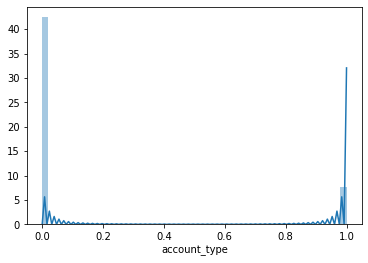

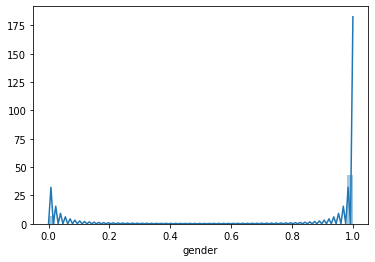

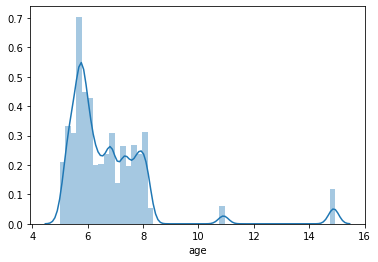

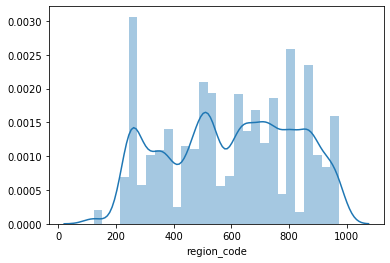

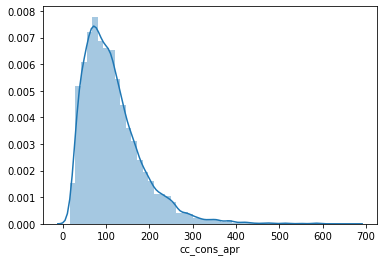

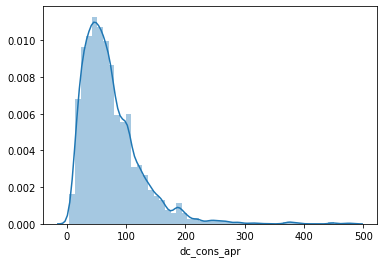

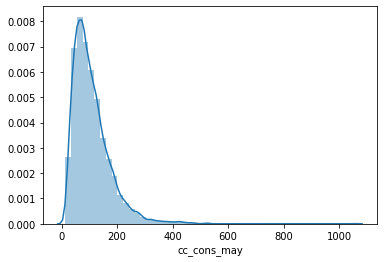

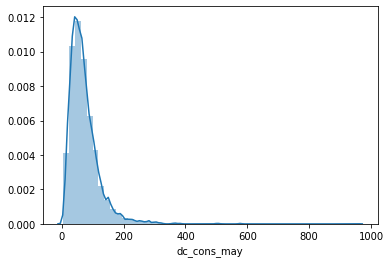

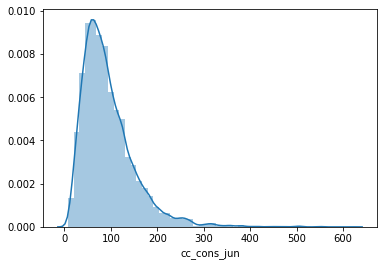

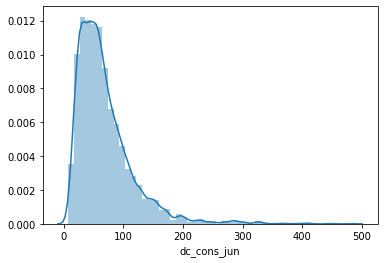

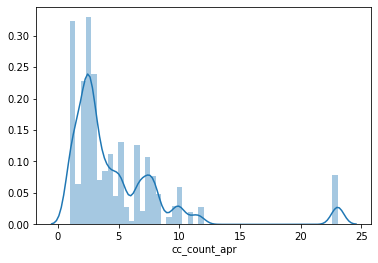

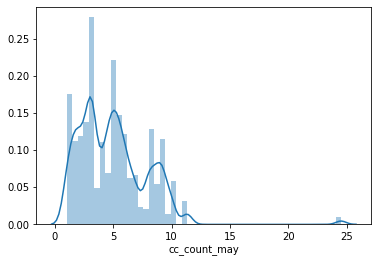

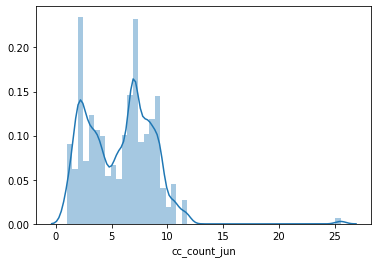

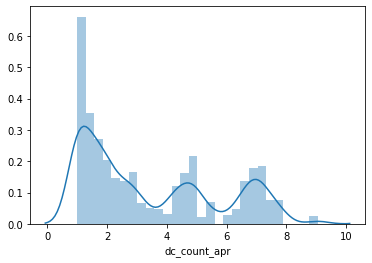

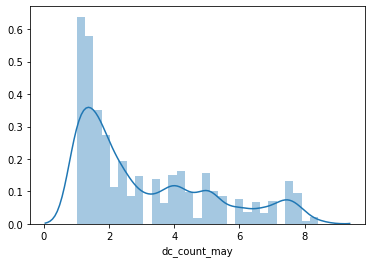

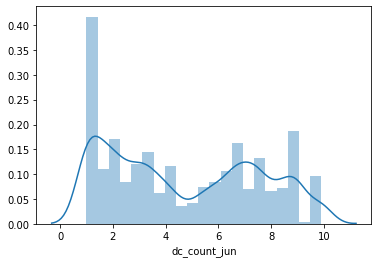

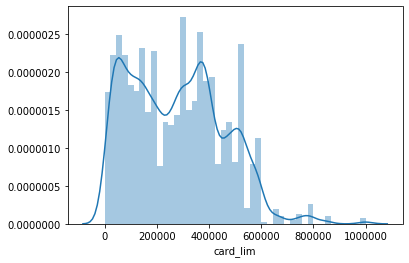

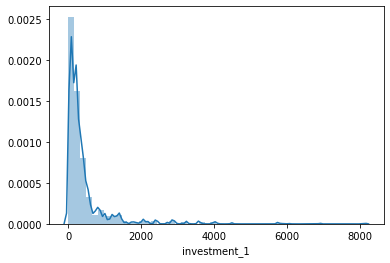

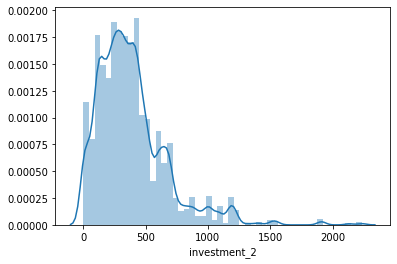

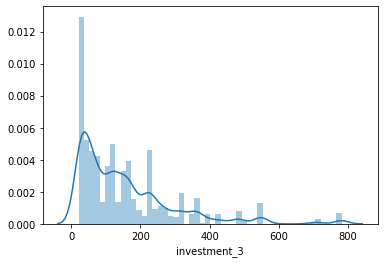

ValueError: cannot convert float NaN to integer

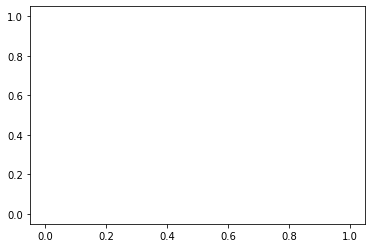

In [28]:
for col in df1.columns:
    sns.distplot(df1[col])
    plt.show()

In [39]:
df1.investment_4=df1.investment_4.fillna(0)

In [20]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#df2 = scaler.fit_transform(df1)
#df2 = pd.DataFrame(df2, columns=df1.columns)


In [21]:
#df2.head(5)

account_type    gender       age  region_code  cc_cons_apr  dc_cons_apr  \
0     -0.422607  0.398433 -0.493897     0.497987     0.621926    -1.089665   
1     -0.422607  0.398433 -0.493897    -2.160439     0.327632    -0.860493   
2     -0.422607  0.398433  0.428705     0.925153    -0.581990    -0.444786   
3     -0.422607 -2.509835 -0.820420     1.220534     0.867879    -0.780227   
4     -0.422607  0.398433 -0.546252     0.925153    -0.422689     0.163880   

   cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  ...  credit_count_may  \
0    -0.099215     2.012254     0.586095     0.784743  ...         -0.658536   
1     0.522913    -1.118003    -0.510587    -0.816079  ...         -0.658536   
2    -0.938169    -0.195333     1.060809     0.058056  ...         -0.658536   
3     0.060386     0.467421     0.668813     0.990395  ...          0.982799   
4    -0.618820    -0.571881    -0.840891     0.281052  ...          1.032864   

   debit_count_may  max_credit_amount_may  debit_amount_jun  \
0         0.219276              -0.368001         -0.488127   
1         1.064314              -0.383652         -0.254387   
2         1.139685              -0.788369          0.012353   
3         0.165301              -0.720289          0.178725   
4         0.470883              -0.351672         -1.023412   

   credit_amount_jun  credit_count_jun  debit_count_jun  \
0          -0.888411         -0.927725         0.706968   
1           0.247062          0.350058         0.663354   
2           0.235388         -0.431052        -1.757044   
3           0.150062          0.350058         1.072675   
4           0.296047         -0.357380        -0.132274   

   max_credit_amount_jun  emi_active   cc_cons  
0               0.244119   -0.426406 -0.201571  
1              -0.375605    0.341804 -0.457946  
2              -0.273611    0.814403 -0.293774  
3               0.091327   -0.231254 -0.540470  
4              -0.149932    0.329679  0.865514  

[5 rows x 38 columns]

In [40]:
def rmsle(actual_column, predicted_column):
    sum=0.0
    for x,y in zip(actual_column,predicted_column):
        if x<0 or y<0: #check for negative values. 
            continue
        p = np.log(y+1)
        r = np.log(x+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted_column))**0.5

In [67]:
#X=df1.drop('cc_cons',1)
#y=df1['cc_cons']

from sklearn.preprocessing import StandardScaler
xscaler = StandardScaler()
yscaler = StandardScaler()
x= xscaler.fit_transform(df1.drop('cc_cons',1))
X=pd.DataFrame(x, columns=df1.drop('cc_cons',1).columns)
y=yscaler.fit_transform(df1[['cc_cons']])
#y=pd.Series(y)

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, random_state=5)
type(y)

numpy.ndarray

In [50]:
#from sklearn.preprocessing import StandardScaler
#xscaler = StandardScaler()
#yscaler = StandardScaler()
##X_train= xscaler.fit_transform(X_train)
#X_val=xscaler.transform(X_val)
#y_train=yscaler.fit_transform(y_train)
#y_val=yscaler.transform(y_val)
X

account_type    gender       age  region_code  cc_cons_apr  \
0         -0.422607  0.398433 -0.493897     0.497987     0.621926   
1         -0.422607  0.398433 -0.493897    -2.160439     0.327632   
2         -0.422607  0.398433  0.428705     0.925153    -0.581990   
3         -0.422607 -2.509835 -0.820420     1.220534     0.867879   
4         -0.422607  0.398433 -0.546252     0.925153    -0.422689   
...             ...       ...       ...          ...          ...   
14995     -0.422607 -2.509835  0.345008     0.248049    -0.189973   
14996     -0.422607  0.398433 -0.052824    -0.288180     0.842692   
14997     -0.422607  0.398433 -0.391384    -0.610827    -0.741880   
14998     -0.422607  0.398433  4.989809    -0.283636     3.283241   
14999     -0.422607  0.398433  0.864040    -1.496969    -0.428267   

       dc_cons_apr  cc_cons_may  dc_cons_may  cc_cons_jun  dc_cons_jun  ...  \
0        -1.089665    -0.099215     2.012254     0.586095     0.784743  ...   
1        -0.860493     0.522913    -1.118003    -0.510587    -0.816079  ...   
2        -0.444786    -0.938169    -0.195333     1.060809     0.058056  ...   
3        -0.780227     0.060386     0.467421     0.668813     0.990395  ...   
4         0.163880    -0.618820    -0.571881    -0.840891     0.281052  ...   
...            ...          ...          ...          ...          ...  ...   
14995    -0.785047    -0.338231    -0.205031    -0.221899     0.652254  ...   
14996     0.091423     0.270439     0.298940    -0.823591    -0.831400  ...   
14997    -0.865985     0.454799    -1.011471     2.037676    -0.552669  ...   
14998     0.197305     1.504202     2.301739     0.868824    -0.773937  ...   
14999    -1.127600    -0.464760     0.190753     1.541160    -1.096775  ...   

       credit_amount_may  credit_count_may  debit_count_may  \
0               1.282157         -0.658536         0.219276   
1               0.123829         -0.658536         1.064314   
2               0.121494         -0.658536         1.139685   
3               0.017603          0.982799         0.165301   
4              -0.503739          1.032864         0.470883   
...                  ...               ...              ...   
14995          -0.639810         -0.859582        -0.959072   
14996          -0.167874         -0.374213        -0.405070   
14997          -0.411080          1.837830        -1.158723   
14998           0.258712         -0.504267        -0.227157   
14999          -0.500923         -0.658536         1.139685   

       max_credit_amount_may  debit_amount_jun  credit_amount_jun  \
0                  -0.368001         -0.488127          -0.888411   
1                  -0.383652         -0.254387           0.247062   
2                  -0.788369          0.012353           0.235388   
3                  -0.720289          0.178725           0.150062   
4                  -0.351672         -1.023412           0.296047   
...                      ...               ...                ...   
14995              -0.950140          3.361869          -0.237476   
14996               1.957822         -1.076670          -0.372612   
14997               0.060316          0.535024           1.884934   
14998              -0.423720         -0.654641          -0.409658   
14999              -0.897600         -0.268568           0.276695   

       credit_count_jun  debit_count_jun  max_credit_amount_jun  emi_active  
0             -0.927725         0.706968               0.244119   -0.426406  
1              0.350058         0.663354              -0.375605    0.341804  
2             -0.431052        -1.757044              -0.273611    0.814403  
3              0.350058         1.072675               0.091327   -0.231254  
4             -0.357380        -0.132274              -0.149932    0.329679  
...                 ...              ...                    ...         ...  
14995          0.010921        -1.119109               0.773113    2.090153  
14996         -0.16

In [68]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [69]:
y_pred_train=lr.predict(X_train)
y_pred_val=lr.predict(X_val)
np.array(y_pred_train)

array([[ 0.00815362],
       [ 0.00663229],
       [ 0.04420666],
       ...,
       [-0.00521484],
       [ 0.02522613],
       [ 0.06140952]])

In [70]:
train_rmsle=rmsle(y_train, y_pred_train)
val_rmsle=rmsle(y_val, y_pred_val)
print(train_rmsle, val_rmsle)

[0.32748129] [0.32803942]


In [71]:
test=pd.read_csv('Test.csv')
test.head()
test.shape

(5000, 43)

In [72]:
X_test=test.set_index('ID').drop(['loan_enq','personal_loan_active','vehicle_loan_active','personal_loan_closed','vehicle_loan_closed'],axis=1)
X_test.shape
#X_test.info()
#type(X_test)

(5000, 37)

In [73]:
X_test.account_type=le_ac.transform(X_test.account_type)
X_test.gender=le_g.transform(X_test.gender)
#X_test.info()
#type(X_test)

In [74]:
for col in X_test.columns:
    if X_test[col].skew()>0.5:
        X_test[col]=np.sqrt(X_test[col])
        
#type(X_test)


C:\Users\AP hatela\Miniconda\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [31]:
X_test=X_test.fillna(0)

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df3 = xscaler.transform(X_test)
df3 = pd.DataFrame(df3, columns=X_test.columns)
df3.shape

(5000, 37)

In [77]:
df3=df3.fillna(0)

In [78]:
y_pred=lr.predict(df3)
y_pred

array([[-0.00401861],
       [ 0.02180125],
       [ 0.00676818],
       ...,
       [-0.05074463],
       [-0.02773689],
       [-0.01455789]])

In [85]:
pred=yscaler.inverse_transform(y_pred)
pred**2

array([[29847.0651876 ],
       [31276.94043885],
       [30440.35719244],
       ...,
       [27344.48047364],
       [28563.05331377],
       [29273.02636717]])

In [86]:
df3['cc_cons']=pred**2

In [87]:
df3.shape

(5000, 38)

In [88]:
#df4=scaler.inverse_transform(df3)
#df4=pd.DataFrame(df4, columns=df3.columns)

In [89]:
result2=pd.DataFrame(df3['cc_cons'])
result2

cc_cons
0     29847.065188
1     31276.940439
2     30440.357192
3     36506.598907
4     31657.023506
...            ...
4995  28537.490346
4996  29487.338531
4997  27344.480474
4998  28563.053314
4999  29273.026367

[5000 rows x 1 columns]

In [205]:
result2.to_csv('GOR_Submission.csv',index=True)